# Готовим данные к машинному обучению: убираем выбросы, заполняем вознкишие пропуски, удаляем ненужные колонки и проводим ОНЕ кодирование

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('final_df.csv')
df

,Unnamed: 0,Название,Ссылка,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,Длина,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Максимальная мощность
0,0,BYD E2,https://auto.ru/cars/used/sale/byd/e2/11231094...,2450000.0,2023.0,1.0,moskva,C,5.0,5,4260.0,1760.0,1530.0,Автомат,передний,130.000000,10.178484,Электро,95 л.с. (70 кВт)
1,1,Changan UNI-K,https://auto.ru/cars/used/sale/changan/uni_k/1...,3440000.0,2023.0,1.0,moskva,E,5.0,5,4865.0,1948.0,1695.0,Автомат,полный,200.000000,5.411007,бензиновый,226 л.с. (166 кВт) при 5500
2,2,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,7760000.0,2024.0,1.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.000000,5.300000,гибридный,449 л.с. (330 кВт)
3,4,Zeekr 007 770,https://auto.ru/cars/used/sale/zeekr/007/11229...,5830000.0,2024.0,1.0,moskva,D,4.0,5,4865.0,1900.0,1450.0,Автомат,полный,210.000000,3.500000,Электро,646 л.с. (475 кВт)
4,5,Zeekr 001 100 kWh,https://auto.ru/cars/used/sale/zeekr/001/11228...,6800000.0,2024.0,1.0,moskva,E,5.0,5,4970.0,1999.0,1560.0,Автомат,полный,200.000000,3.800000,Электро,544 л.с. (400 кВт)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2907,Changan UNI-V,https://auto.ru/cars/used/sale/changan/uni_v/1...,2160000.0,2023.0,6.0,vladivostok,C,5.0,5,4680.0,1838.0,1430.0,Робот,передний,205.000000,7.100000,бензиновый,181 л.с. (133 кВт) при 5500
2854,2908,FAW Bestune T55,https://auto.ru/cars/used/sale/faw/bestune_t55...,1430000.0,2021.0,41.0,vladivostok,C,5.0,5,4437.0,1850.0,1625.0,Робот,передний,190.000000,10.178484,бензиновый,169 л.с. (124 кВт) при 5500
2855,2909,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1490000.0,2021.0,16.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.000000,7.900000,бензиновый,177 л.с. (130 кВт) при 5500
2856,2910,Changan UNI-T,https://auto.ru/cars/used/sale/changan/uni_t/1...,1900000.0,2022.0,5.0,vladivostok,C,5.0,5,4515.0,1870.0,1565.0,Робот,передний,205.000000,10.178484,бензиновый,188 л.с. (138 кВт) при 5500


### Проверим численные переменные на выбросы

Цена это наш таргет, поэтому важно почистить его от выбросов. Далее я буду строить гистограммы числовых переменных, логарифмированных переменных, а также ящик с усами. С помощью этих графиков хорошо видно есть ли выбросы.

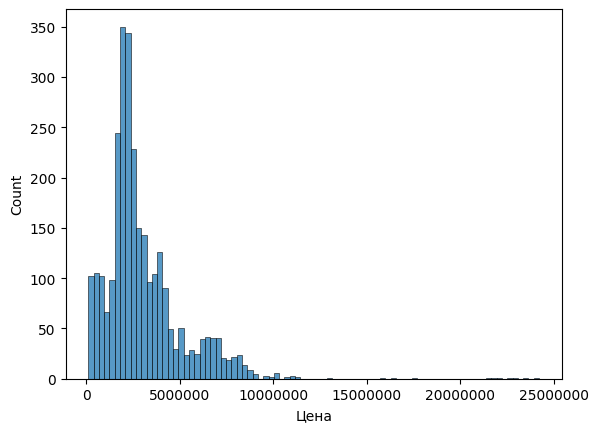

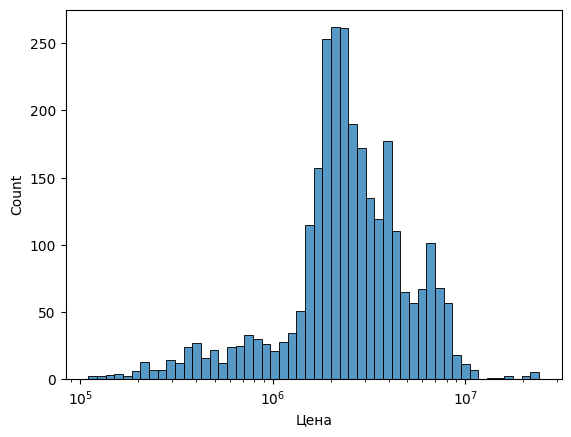

<Axes: ylabel='Цена'>

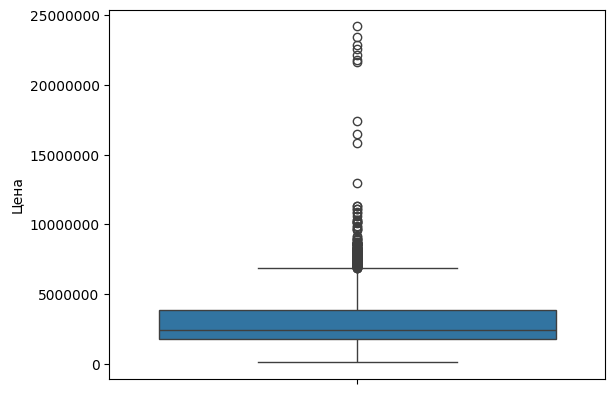

In [97]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Цена'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Цена'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Цена"])

In [98]:
np.mean(df['Цена'])

3040430.3708887333

Очевидно из графиков, что модели машин с ценой более чем в 10 миллионов находятся в абсолютном меньшинстве. Для повышения качества модели отбросим значения более 10 миллионов.

In [99]:
print(len(df))
df = df[df['Цена'] < 10000000]
print(len(df))
df

2858
2834


,Unnamed: 0,Название,Ссылка,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,Длина,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Максимальная мощность
0,0,BYD E2,https://auto.ru/cars/used/sale/byd/e2/11231094...,2450000.0,2023.0,1.0,moskva,C,5.0,5,4260.0,1760.0,1530.0,Автомат,передний,130.000000,10.178484,Электро,95 л.с. (70 кВт)
1,1,Changan UNI-K,https://auto.ru/cars/used/sale/changan/uni_k/1...,3440000.0,2023.0,1.0,moskva,E,5.0,5,4865.0,1948.0,1695.0,Автомат,полный,200.000000,5.411007,бензиновый,226 л.с. (166 кВт) при 5500
2,2,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,7760000.0,2024.0,1.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.000000,5.300000,гибридный,449 л.с. (330 кВт)
3,4,Zeekr 007 770,https://auto.ru/cars/used/sale/zeekr/007/11229...,5830000.0,2024.0,1.0,moskva,D,4.0,5,4865.0,1900.0,1450.0,Автомат,полный,210.000000,3.500000,Электро,646 л.с. (475 кВт)
4,5,Zeekr 001 100 kWh,https://auto.ru/cars/used/sale/zeekr/001/11228...,6800000.0,2024.0,1.0,moskva,E,5.0,5,4970.0,1999.0,1560.0,Автомат,полный,200.000000,3.800000,Электро,544 л.с. (400 кВт)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2907,Changan UNI-V,https://auto.ru/cars/used/sale/changan/uni_v/1...,2160000.0,2023.0,6.0,vladivostok,C,5.0,5,4680.0,1838.0,1430.0,Робот,передний,205.000000,7.100000,бензиновый,181 л.с. (133 кВт) при 5500
2854,2908,FAW Bestune T55,https://auto.ru/cars/used/sale/faw/bestune_t55...,1430000.0,2021.0,41.0,vladivostok,C,5.0,5,4437.0,1850.0,1625.0,Робот,передний,190.000000,10.178484,бензиновый,169 л.с. (124 кВт) при 5500
2855,2909,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1490000.0,2021.0,16.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.000000,7.900000,бензиновый,177 л.с. (130 кВт) при 5500
2856,2910,Changan UNI-T,https://auto.ru/cars/used/sale/changan/uni_t/1...,1900000.0,2022.0,5.0,vladivostok,C,5.0,5,4515.0,1870.0,1565.0,Робот,передний,205.000000,10.178484,бензиновый,188 л.с. (138 кВт) при 5500


In [100]:
np.mean(df['Цена'])

2939181.369089626

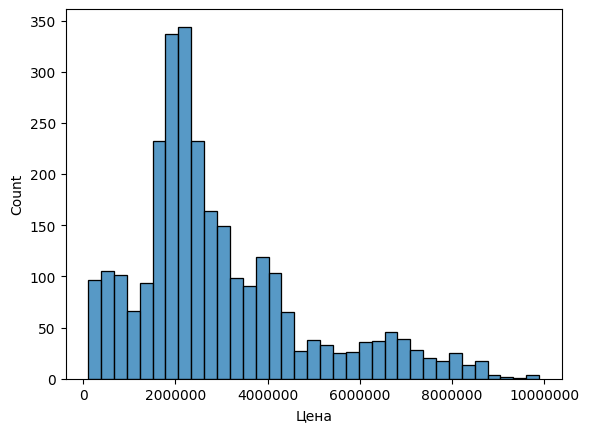

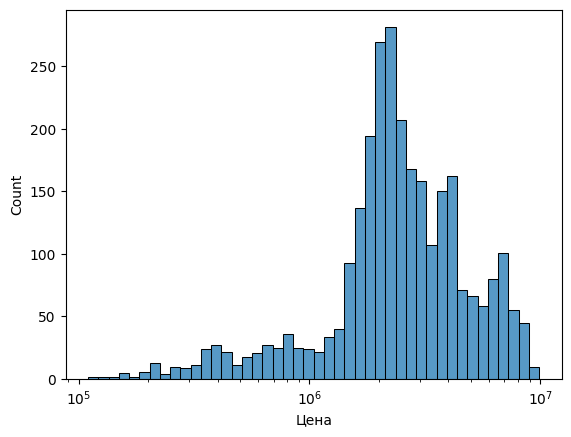

<Axes: ylabel='Цена'>

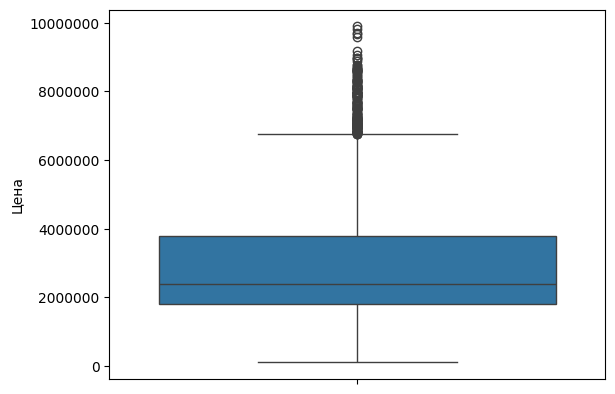

In [101]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Цена'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Цена'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Цена"])

### Проверим, что с годами все хорошо

In [102]:
np.unique(df['Год'])

array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022.,
       2023., 2024.])

Очеивдно, что все хорошо

### Посмотрим на километраж. Переменная измеряется в 1000. Домножим и посмотрим, нет ли там выбросов

/var/folders/__/bgrxm1b54x1c861px_7f945h0000gn/T/ipykernel_1528/3052979826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Километраж'] = df['Километраж'] * 1000


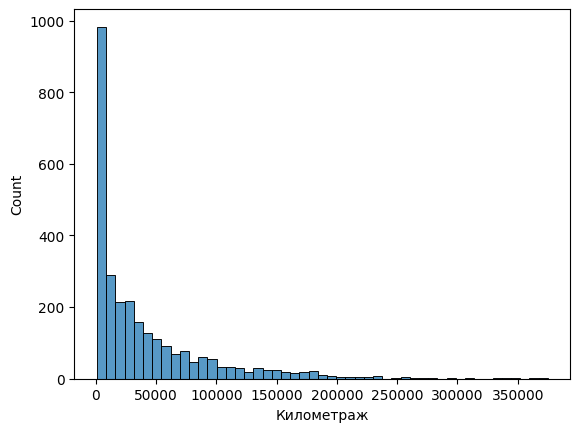

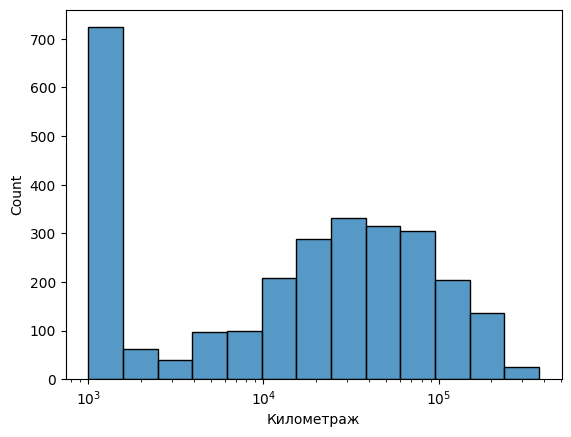

<Axes: ylabel='Километраж'>

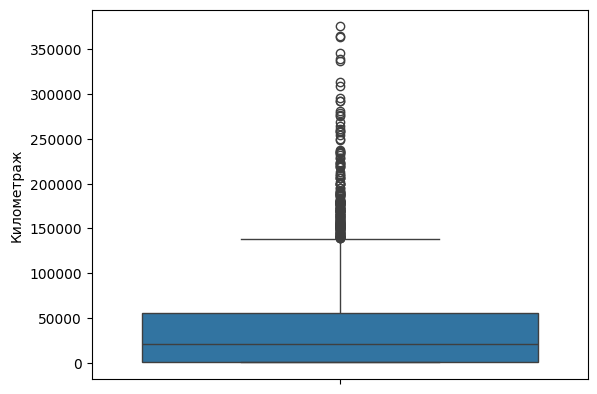

In [103]:
df['Километраж'] = df['Километраж'] * 1000
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Километраж'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Километраж'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Километраж"])

Видно, что есть длинный хвост -- выкинем машины с километражом более чем в 200 тысяч километров

2834
2784


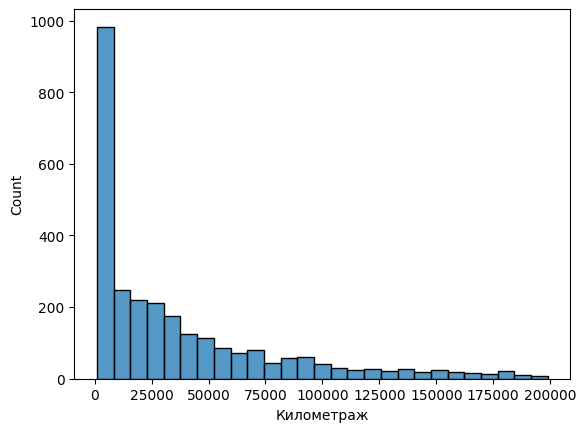

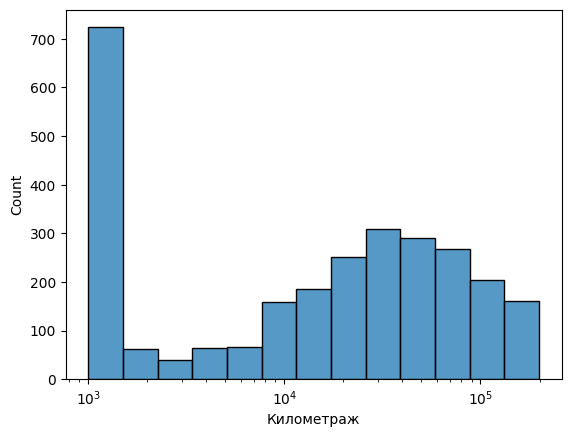

,Unnamed: 0,Название,Ссылка,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,Длина,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Максимальная мощность
0,0,BYD E2,https://auto.ru/cars/used/sale/byd/e2/11231094...,2450000.0,2023.0,1000.0,moskva,C,5.0,5,4260.0,1760.0,1530.0,Автомат,передний,130.000000,10.178484,Электро,95 л.с. (70 кВт)
1,1,Changan UNI-K,https://auto.ru/cars/used/sale/changan/uni_k/1...,3440000.0,2023.0,1000.0,moskva,E,5.0,5,4865.0,1948.0,1695.0,Автомат,полный,200.000000,5.411007,бензиновый,226 л.с. (166 кВт) при 5500
2,2,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,7760000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.000000,5.300000,гибридный,449 л.с. (330 кВт)
3,4,Zeekr 007 770,https://auto.ru/cars/used/sale/zeekr/007/11229...,5830000.0,2024.0,1000.0,moskva,D,4.0,5,4865.0,1900.0,1450.0,Автомат,полный,210.000000,3.500000,Электро,646 л.с. (475 кВт)
4,5,Zeekr 001 100 kWh,https://auto.ru/cars/used/sale/zeekr/001/11228...,6800000.0,2024.0,1000.0,moskva,E,5.0,5,4970.0,1999.0,1560.0,Автомат,полный,200.000000,3.800000,Электро,544 л.с. (400 кВт)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2907,Changan UNI-V,https://auto.ru/cars/used/sale/changan/uni_v/1...,2160000.0,2023.0,6000.0,vladivostok,C,5.0,5,4680.0,1838.0,1430.0,Робот,передний,205.000000,7.100000,бензиновый,181 л.с. (133 кВт) при 5500
2854,2908,FAW Bestune T55,https://auto.ru/cars/used/sale/faw/bestune_t55...,1430000.0,2021.0,41000.0,vladivostok,C,5.0,5,4437.0,1850.0,1625.0,Робот,передний,190.000000,10.178484,бензиновый,169 л.с. (124 кВт) при 5500
2855,2909,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1490000.0,2021.0,16000.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.000000,7.900000,бензиновый,177 л.с. (130 кВт) при 5500
2856,2910,Changan UNI-T,https://auto.ru/cars/used/sale/changan/uni_t/1...,1900000.0,2022.0,5000.0,vladivostok,C,5.0,5,4515.0,1870.0,1565.0,Робот,передний,205.000000,10.178484,бензиновый,188 л.с. (138 кВт) при 5500


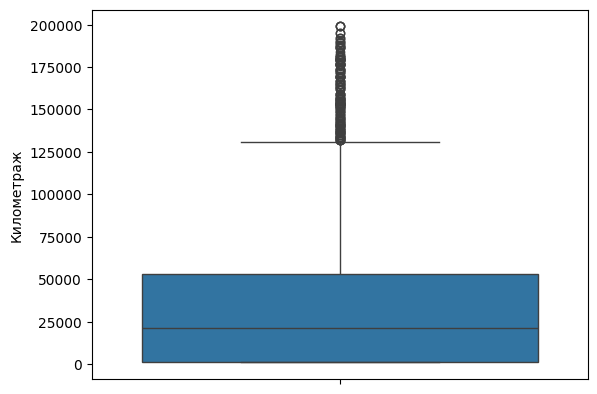

In [104]:
print(len(df))
df = df[df['Километраж'] < 200000]
print(len(df))
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Километраж'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Километраж'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Километраж"])
df

### Проверим длину, ширину и высоту автомобиля

Длина

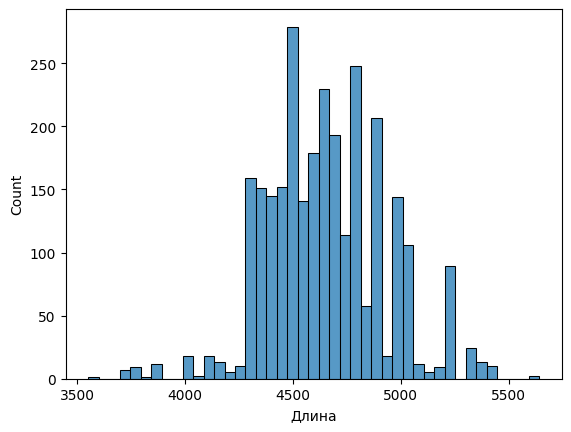

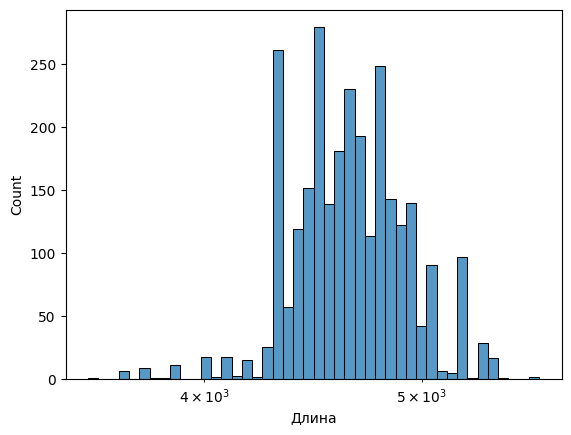

<Axes: ylabel='Длина'>

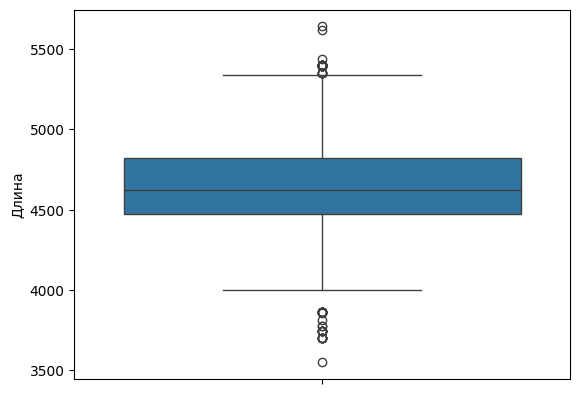

In [105]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Длина'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Длина'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Длина"])

Есть небольшие выбросы, уберем значения менее чем 3750 и более чем 5400

2784
2757


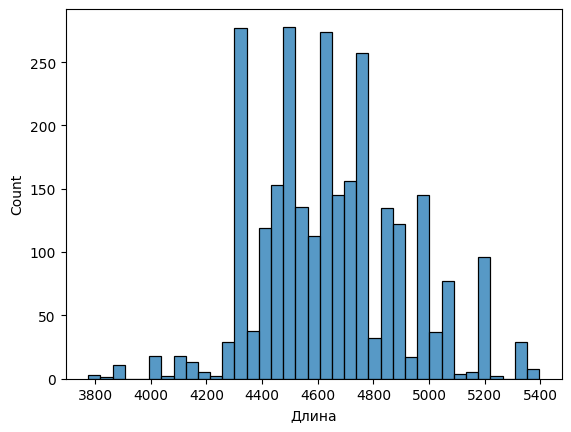

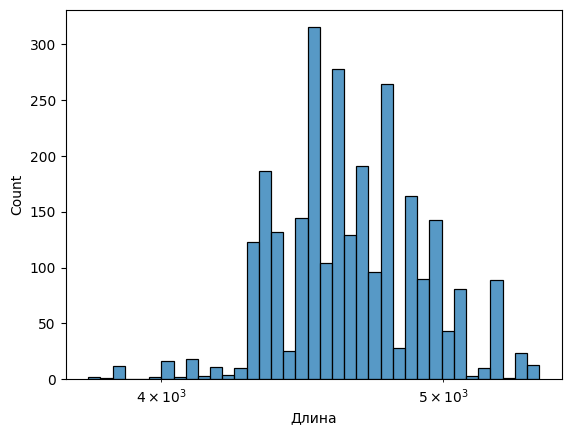

<Axes: ylabel='Длина'>

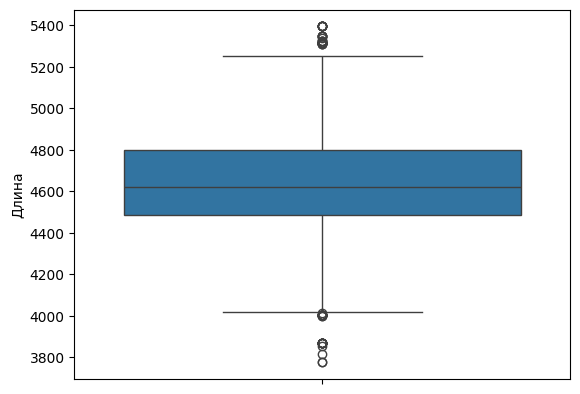

In [106]:
print(len(df))
df = df[df['Длина'] > 3750]
df = df[df['Длина'] < 5400]
print(len(df))
sns.histplot(df['Длина'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Длина'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Длина"])

Перейдем к ширине

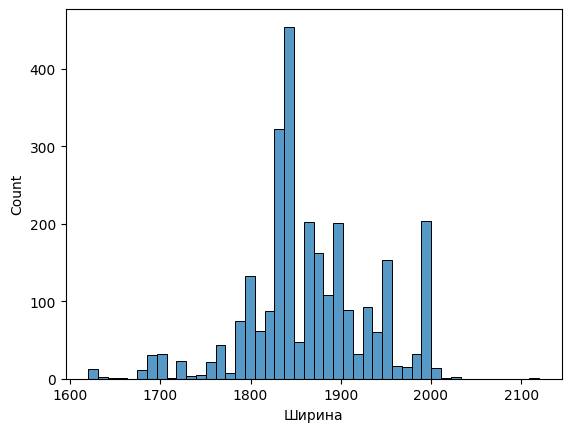

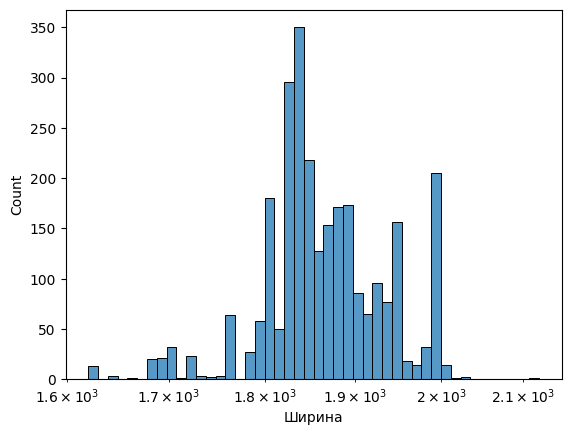

<Axes: ylabel='Ширина'>

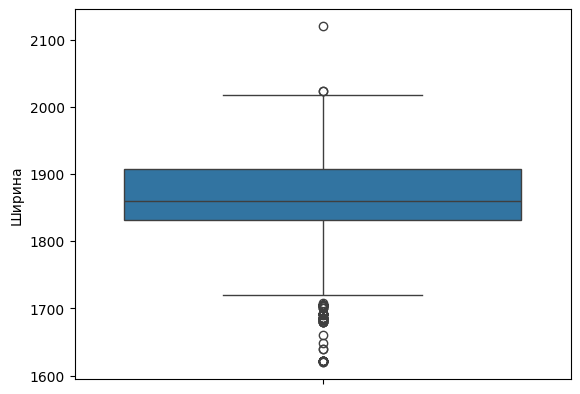

In [107]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Ширина'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Ширина'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Ширина"])

Есть небольшие выбросы - почистим

2757
2634


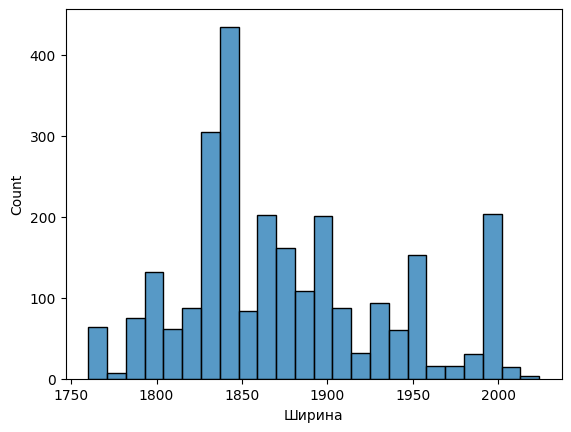

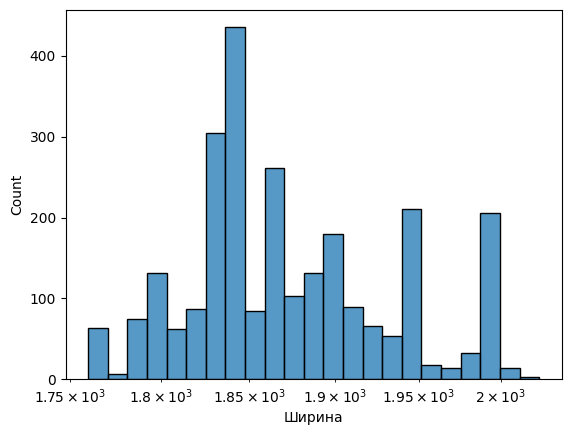

<Axes: ylabel='Ширина'>

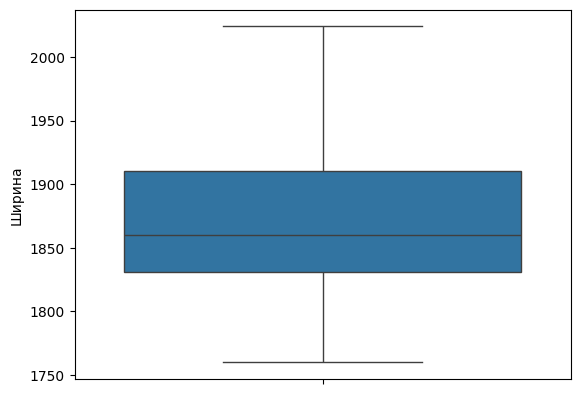

In [108]:
print(len(df))
df = df[df['Ширина'] > 1750]
df = df[df['Ширина'] < 2050]
print(len(df))
sns.histplot(df['Ширина'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Ширина'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Ширина"])


Перейдем к высоте

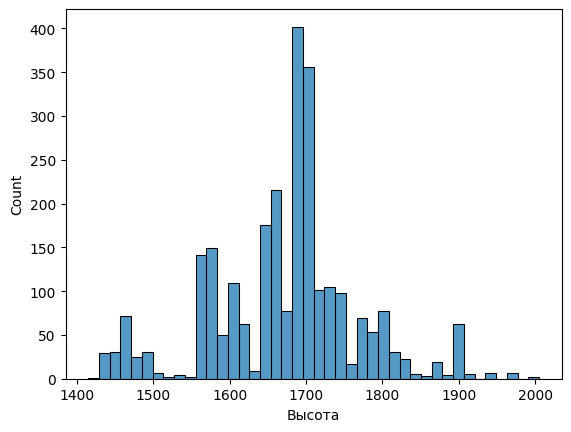

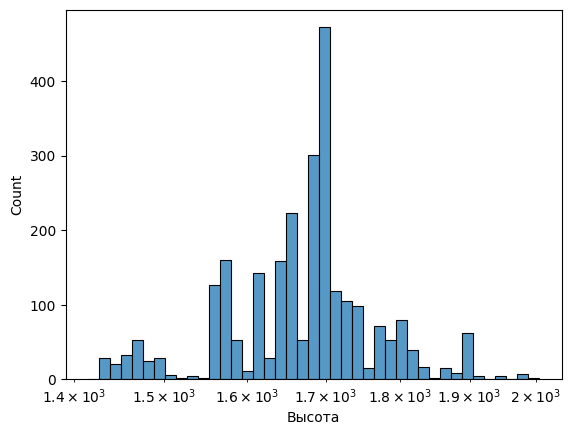

<Axes: ylabel='Высота'>

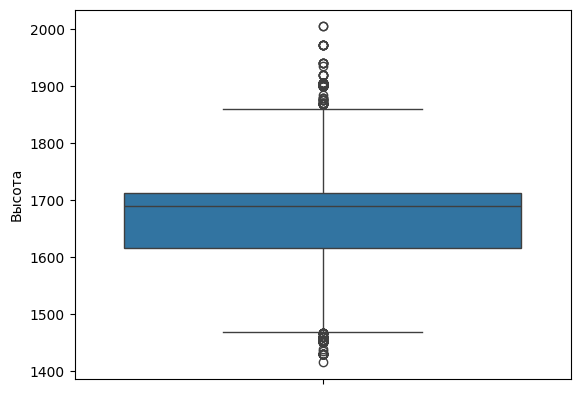

In [109]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Высота'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Высота'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Высота"])

Здесь есть длинный хвост свехру и небольшой снизу. Уберем значения более чем 1900 и менее чем 1450

2634
2501


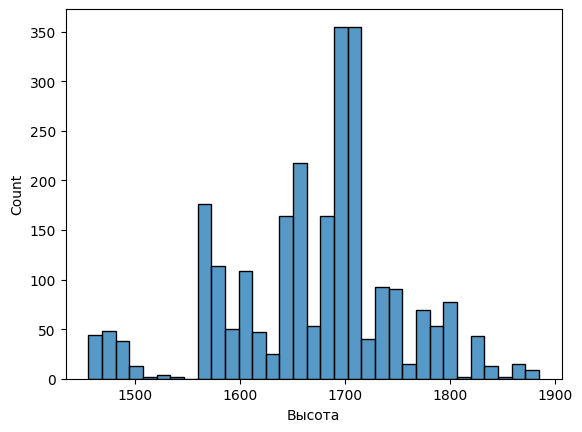

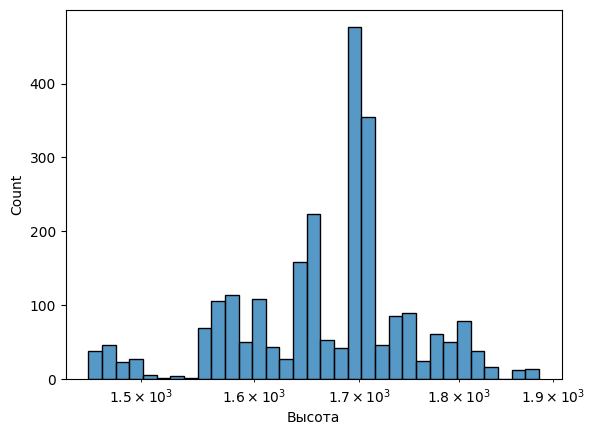

<Axes: ylabel='Высота'>

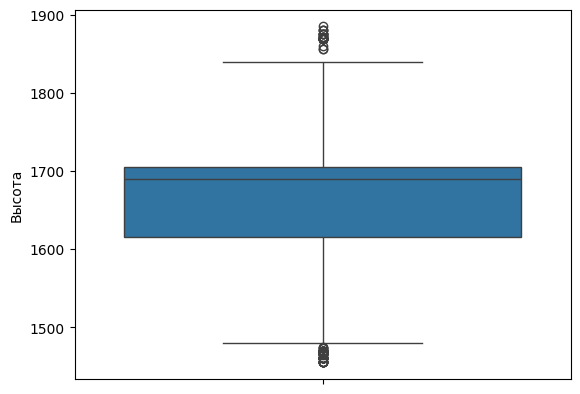

In [110]:
print(len(df))
df = df[df['Высота'] > 1450]
df = df[df['Высота'] < 1900]
print(len(df))
sns.histplot(df['Высота'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Высота'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Высота"])

С размерами автомобиля закончили. Теперь модель будет лучше обучаться

### Проверим скорость

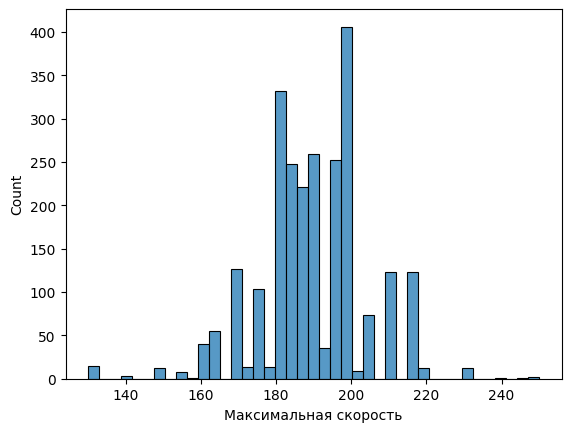

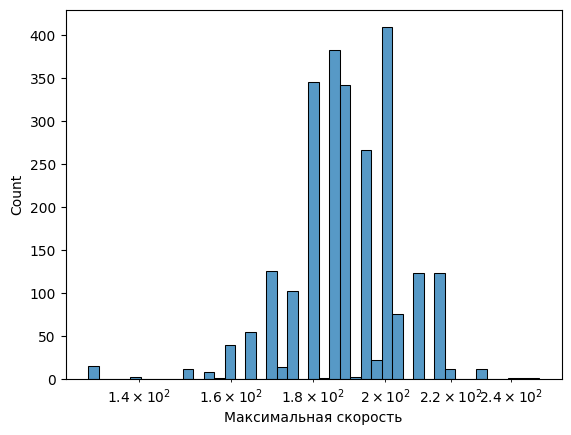

<Axes: ylabel='Максимальная скорость'>

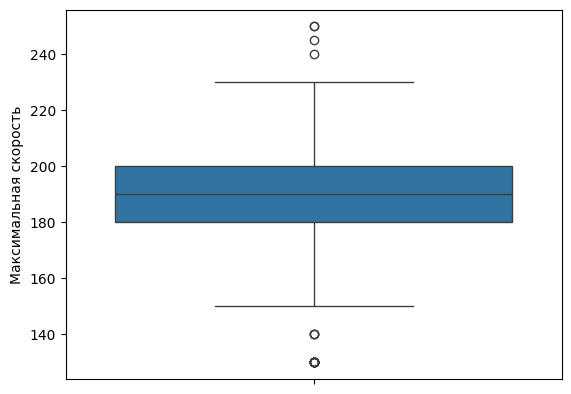

In [111]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Максимальная скорость'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Максимальная скорость'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Максимальная скорость"])

Уберем выбросы

2501
2479


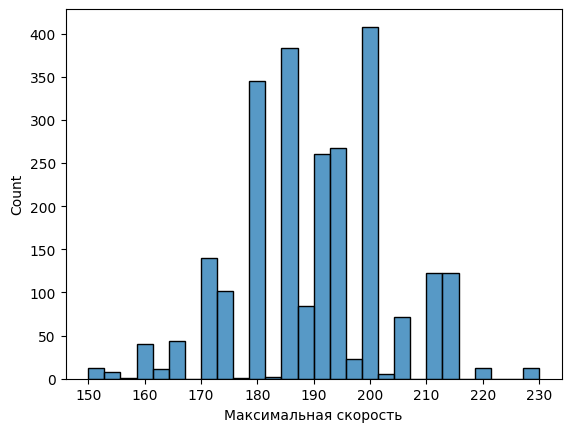

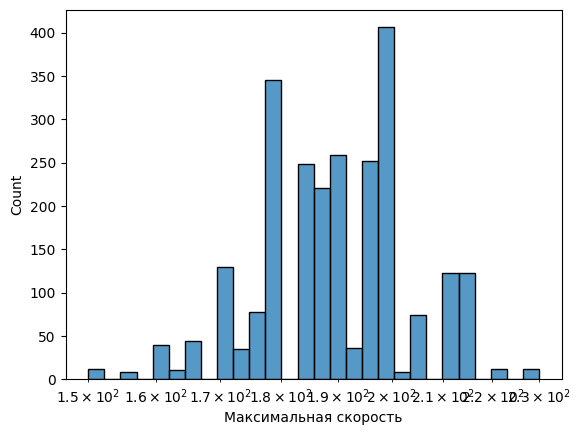

<Axes: ylabel='Максимальная скорость'>

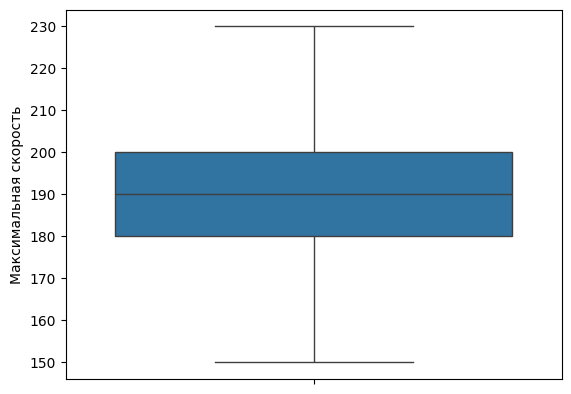

In [112]:
print(len(df))
df = df[df['Максимальная скорость'] > 140]
df = df[df['Максимальная скорость'] < 235]
print(len(df))
sns.histplot(df['Максимальная скорость'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Максимальная скорость'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Максимальная скорость"])

### Разгон до 100

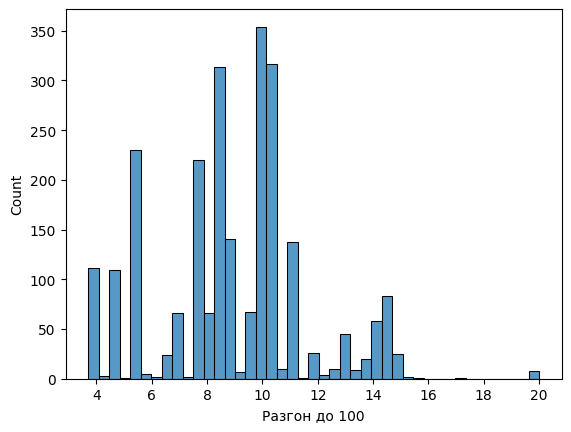

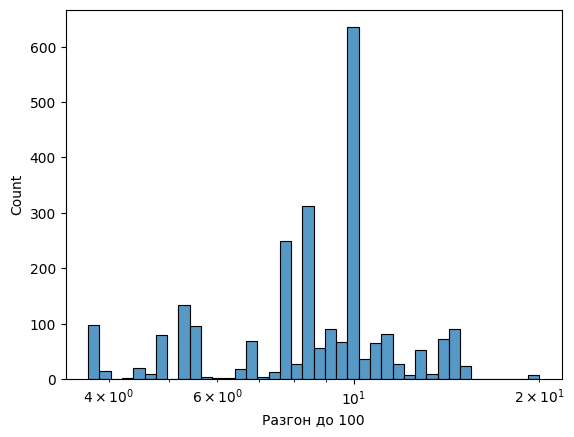

<Axes: ylabel='Разгон до 100'>

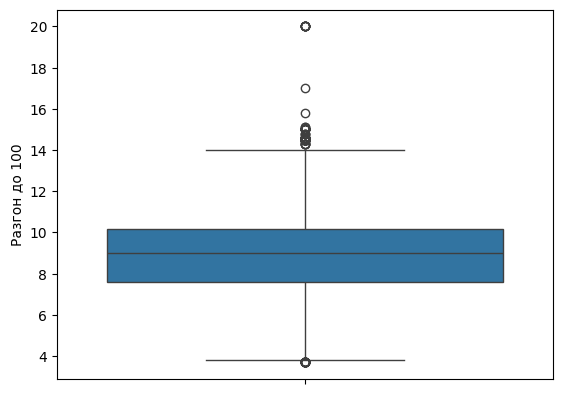

In [113]:
sns.histplot(df['Разгон до 100'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Разгон до 100'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Разгон до 100"])

Уберем значения более 15

2479
2445


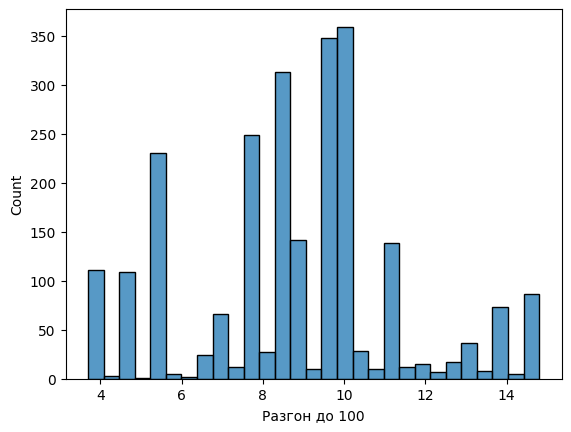

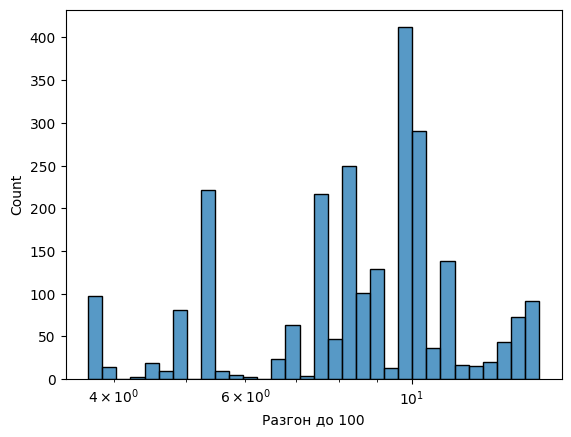

<Axes: ylabel='Разгон до 100'>

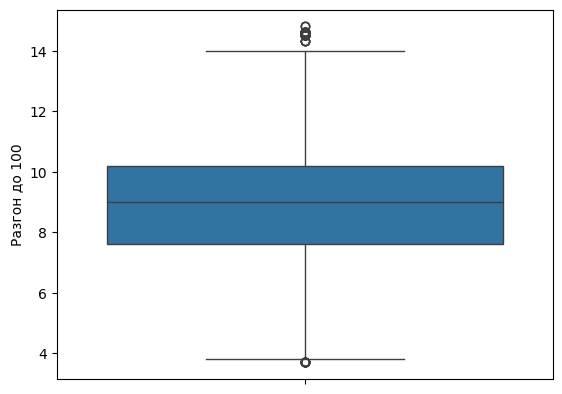

In [114]:
print(len(df))
df = df[df['Разгон до 100'] < 15]
print(len(df))
sns.histplot(df['Разгон до 100'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Разгон до 100'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Разгон до 100"])

### Перейдем к максимальной мощности

In [115]:
df

,Unnamed: 0,Название,Ссылка,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,Длина,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Максимальная мощность
1,1,Changan UNI-K,https://auto.ru/cars/used/sale/changan/uni_k/1...,3440000.0,2023.0,1000.0,moskva,E,5.0,5,4865.0,1948.0,1695.0,Автомат,полный,200.0,5.411007,бензиновый,226 л.с. (166 кВт) при 5500
2,2,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,7760000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт)
4,5,Zeekr 001 100 kWh,https://auto.ru/cars/used/sale/zeekr/001/11228...,6800000.0,2024.0,1000.0,moskva,E,5.0,5,4970.0,1999.0,1560.0,Автомат,полный,200.0,3.800000,Электро,544 л.с. (400 кВт)
6,7,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,8690000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт)
7,8,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,8170000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,2904,Haval DaGou (Big Dog),https://auto.ru/cars/used/sale/haval/dagou/112...,2320000.0,2022.0,30000.0,vladivostok,C,5.0,5,4620.0,1890.0,1780.0,Робот,полный,195.0,10.178484,бензиновый,211 л.с. (155 кВт) при 6300
2852,2906,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1580000.0,2021.0,17000.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177 л.с. (130 кВт) при 5500
2854,2908,FAW Bestune T55,https://auto.ru/cars/used/sale/faw/bestune_t55...,1430000.0,2021.0,41000.0,vladivostok,C,5.0,5,4437.0,1850.0,1625.0,Робот,передний,190.0,10.178484,бензиновый,169 л.с. (124 кВт) при 5500
2855,2909,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1490000.0,2021.0,16000.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177 л.с. (130 кВт) при 5500


В максимальной мощности есть три цифры - лошадиные силы, кВТ и обороты в минуту

In [116]:
df['Лошадиные силы'] = df['Максимальная мощность'].apply(lambda x: float(x.split(' л.с. ')[0]))
df['Обороты в минуту'] = df['Максимальная мощность'].apply(lambda x: x.split(' при ')[1] if len(x.split(' при ')) == 2 else None)
df

,Unnamed: 0,Название,Ссылка,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,...,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Максимальная мощность,Лошадиные силы,Обороты в минуту
1,1,Changan UNI-K,https://auto.ru/cars/used/sale/changan/uni_k/1...,3440000.0,2023.0,1000.0,moskva,E,5.0,5,...,1948.0,1695.0,Автомат,полный,200.0,5.411007,бензиновый,226 л.с. (166 кВт) при 5500,226.0,5500
2,2,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,7760000.0,2024.0,1000.0,moskva,F,5.0,6,...,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт),449.0,None
4,5,Zeekr 001 100 kWh,https://auto.ru/cars/used/sale/zeekr/001/11228...,6800000.0,2024.0,1000.0,moskva,E,5.0,5,...,1999.0,1560.0,Автомат,полный,200.0,3.800000,Электро,544 л.с. (400 кВт),544.0,None
6,7,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,8690000.0,2024.0,1000.0,moskva,F,5.0,6,...,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт),449.0,None
7,8,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,8170000.0,2024.0,1000.0,moskva,F,5.0,6,...,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт),449.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,2904,Haval DaGou (Big Dog),https://auto.ru/cars/used/sale/haval/dagou/112...,2320000.0,2022.0,30000.0,vladivostok,C,5.0,5,...,1890.0,1780.0,Робот,полный,195.0,10.178484,бензиновый,211 л.с. (155 кВт) при 6300,211.0,6300
2852,2906,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1580000.0,2021.0,17000.0,vladivostok,B,5.0,5,...,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177 л.с. (130 кВт) при 5500,177.0,5500
2854,2908,FAW Bestune T55,https://auto.ru/cars/used/sale/faw/bestune_t55...,1430000.0,2021.0,41000.0,vladivostok,C,5.0,5,...,1850.0,1625.0,Робот,передний,190.0,10.178484,бензиновый,169 л.с. (124 кВт) при 5500,169.0,5500
2855,2909,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1490000.0,2021.0,16000.0,vladivostok,B,5.0,5,...,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177 л.с. (130 кВт) при 5500,177.0,5500


Посмотрим пропуски

<Axes: >

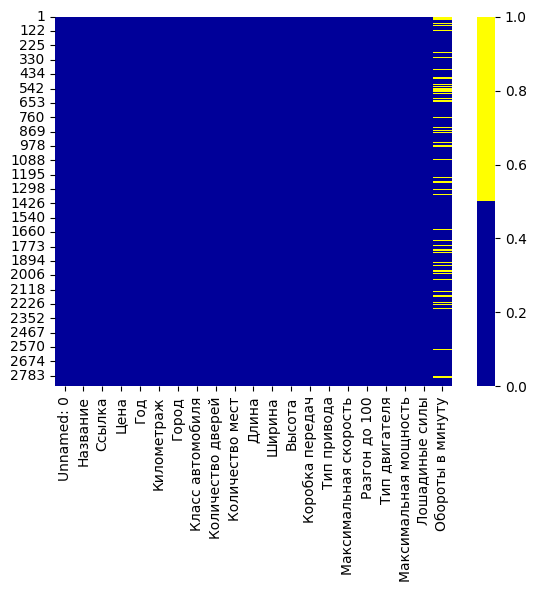

In [117]:
cols = df.columns # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Заполним эти пропуски значением моды

In [118]:
mode_rev = df['Обороты в минуту'].mode()
print(mode_rev)
df['Обороты в минуту'] = df['Обороты в минуту'].fillna(mode_rev[0])
df

0    5500
Name: Обороты в минуту, dtype: object


,Unnamed: 0,Название,Ссылка,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,...,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Максимальная мощность,Лошадиные силы,Обороты в минуту
1,1,Changan UNI-K,https://auto.ru/cars/used/sale/changan/uni_k/1...,3440000.0,2023.0,1000.0,moskva,E,5.0,5,...,1948.0,1695.0,Автомат,полный,200.0,5.411007,бензиновый,226 л.с. (166 кВт) при 5500,226.0,5500
2,2,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,7760000.0,2024.0,1000.0,moskva,F,5.0,6,...,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт),449.0,5500
4,5,Zeekr 001 100 kWh,https://auto.ru/cars/used/sale/zeekr/001/11228...,6800000.0,2024.0,1000.0,moskva,E,5.0,5,...,1999.0,1560.0,Автомат,полный,200.0,3.800000,Электро,544 л.с. (400 кВт),544.0,5500
6,7,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,8690000.0,2024.0,1000.0,moskva,F,5.0,6,...,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт),449.0,5500
7,8,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,8170000.0,2024.0,1000.0,moskva,F,5.0,6,...,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449 л.с. (330 кВт),449.0,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,2904,Haval DaGou (Big Dog),https://auto.ru/cars/used/sale/haval/dagou/112...,2320000.0,2022.0,30000.0,vladivostok,C,5.0,5,...,1890.0,1780.0,Робот,полный,195.0,10.178484,бензиновый,211 л.с. (155 кВт) при 6300,211.0,6300
2852,2906,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1580000.0,2021.0,17000.0,vladivostok,B,5.0,5,...,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177 л.с. (130 кВт) при 5500,177.0,5500
2854,2908,FAW Bestune T55,https://auto.ru/cars/used/sale/faw/bestune_t55...,1430000.0,2021.0,41000.0,vladivostok,C,5.0,5,...,1850.0,1625.0,Робот,передний,190.0,10.178484,бензиновый,169 л.с. (124 кВт) при 5500,169.0,5500
2855,2909,Geely Icon,https://auto.ru/cars/used/sale/geely/icon/1123...,1490000.0,2021.0,16000.0,vladivostok,B,5.0,5,...,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177 л.с. (130 кВт) при 5500,177.0,5500


Выкинем лишние столбцы: ссылка и unnamed

In [119]:
df = df.drop(['Unnamed: 0', 'Ссылка', 'Максимальная мощность'], axis=1)
df

,Название,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,Длина,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Лошадиные силы,Обороты в минуту
1,Changan UNI-K,3440000.0,2023.0,1000.0,moskva,E,5.0,5,4865.0,1948.0,1695.0,Автомат,полный,200.0,5.411007,бензиновый,226.0,5500
2,LiXiang L9 44.5 kWh,7760000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449.0,5500
4,Zeekr 001 100 kWh,6800000.0,2024.0,1000.0,moskva,E,5.0,5,4970.0,1999.0,1560.0,Автомат,полный,200.0,3.800000,Электро,544.0,5500
6,LiXiang L9 44.5 kWh,8690000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449.0,5500
7,LiXiang L9 44.5 kWh,8170000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449.0,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,Haval DaGou (Big Dog),2320000.0,2022.0,30000.0,vladivostok,C,5.0,5,4620.0,1890.0,1780.0,Робот,полный,195.0,10.178484,бензиновый,211.0,6300
2852,Geely Icon,1580000.0,2021.0,17000.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177.0,5500
2854,FAW Bestune T55,1430000.0,2021.0,41000.0,vladivostok,C,5.0,5,4437.0,1850.0,1625.0,Робот,передний,190.0,10.178484,бензиновый,169.0,5500
2855,Geely Icon,1490000.0,2021.0,16000.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177.0,5500


### Проверим лошадиные силы и обороты в минуту на выбросы

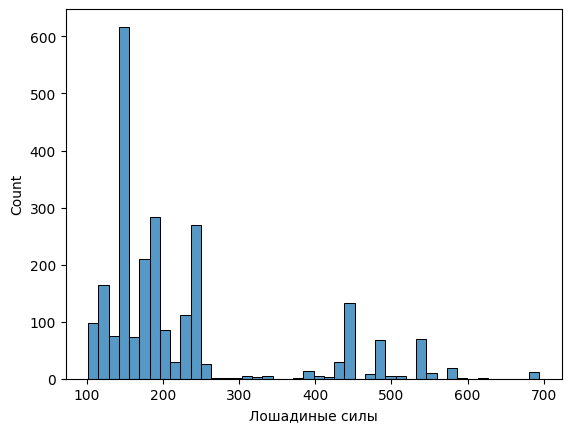

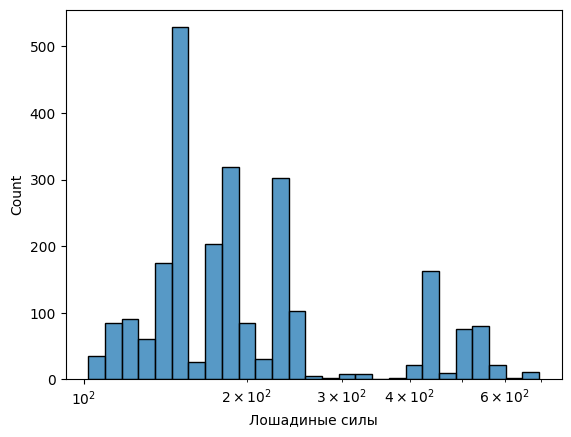

<Axes: ylabel='Лошадиные силы'>

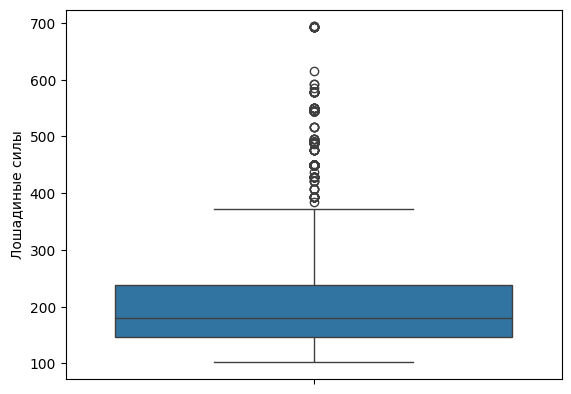

In [120]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Лошадиные силы'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Лошадиные силы'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Лошадиные силы"])

Сверху есть серьезный хвост

2445
2247


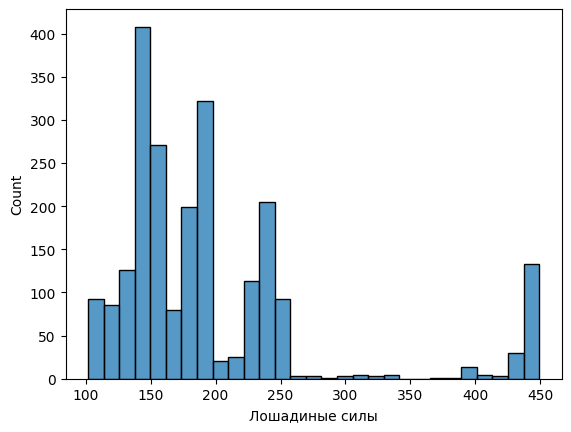

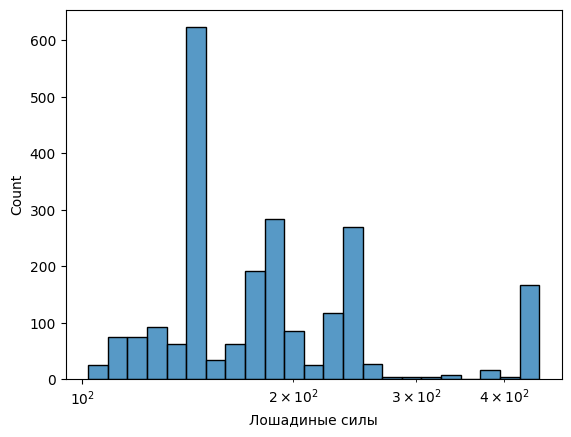

<Axes: ylabel='Лошадиные силы'>

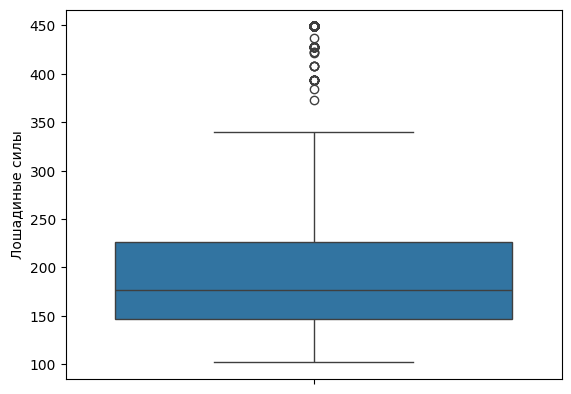

In [121]:
print(len(df))
df = df[df['Лошадиные силы'] < 450]
print(len(df))
sns.histplot(df['Лошадиные силы'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Лошадиные силы'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Лошадиные силы"])

### Проведем ОНЕ кодирование

In [123]:
df

,Название,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,Длина,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Лошадиные силы,Обороты в минуту
1,Changan UNI-K,3440000.0,2023.0,1000.0,moskva,E,5.0,5,4865.0,1948.0,1695.0,Автомат,полный,200.0,5.411007,бензиновый,226.0,5500
2,LiXiang L9 44.5 kWh,7760000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449.0,5500
6,LiXiang L9 44.5 kWh,8690000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449.0,5500
7,LiXiang L9 44.5 kWh,8170000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449.0,5500
8,LiXiang L9 44.5 kWh,8060000.0,2024.0,1000.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.300000,гибридный,449.0,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,Haval DaGou (Big Dog),2320000.0,2022.0,30000.0,vladivostok,C,5.0,5,4620.0,1890.0,1780.0,Робот,полный,195.0,10.178484,бензиновый,211.0,6300
2852,Geely Icon,1580000.0,2021.0,17000.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177.0,5500
2854,FAW Bestune T55,1430000.0,2021.0,41000.0,vladivostok,C,5.0,5,4437.0,1850.0,1625.0,Робот,передний,190.0,10.178484,бензиновый,169.0,5500
2855,Geely Icon,1490000.0,2021.0,16000.0,vladivostok,B,5.0,5,4350.0,1810.0,1615.0,Робот,передний,195.0,7.900000,бензиновый,177.0,5500


Сначала выделим список категореальных переменных

In [125]:
var_сat = ['Город', 'Класс автомобиля', 'Коробка передач', 'Тип привода', 'Тип двигателя']

Начнем

In [126]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
for cat in var_сat:
    transform = ohe.fit_transform(df[[cat]])
    df = pd.concat([df, transform], axis = 1).drop(columns = [cat])
df

,Название,Цена,Год,Километраж,Количество дверей,Количество мест,Длина,Ширина,Высота,Максимальная скорость,...,Коробка передач_Вариатор,Коробка передач_Механика,Коробка передач_Робот,Тип привода_задний,Тип привода_передний,Тип привода_полный,Тип двигателя_Электро,Тип двигателя_бензиновый,Тип двигателя_гибридный,Тип двигателя_дизельный
1,Changan UNI-K,3440000.0,2023.0,1000.0,5.0,5,4865.0,1948.0,1695.0,200.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,LiXiang L9 44.5 kWh,7760000.0,2024.0,1000.0,5.0,6,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,LiXiang L9 44.5 kWh,8690000.0,2024.0,1000.0,5.0,6,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,LiXiang L9 44.5 kWh,8170000.0,2024.0,1000.0,5.0,6,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,LiXiang L9 44.5 kWh,8060000.0,2024.0,1000.0,5.0,6,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,Haval DaGou (Big Dog),2320000.0,2022.0,30000.0,5.0,5,4620.0,1890.0,1780.0,195.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2852,Geely Icon,1580000.0,2021.0,17000.0,5.0,5,4350.0,1810.0,1615.0,195.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2854,FAW Bestune T55,1430000.0,2021.0,41000.0,5.0,5,4437.0,1850.0,1625.0,190.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2855,Geely Icon,1490000.0,2021.0,16000.0,5.0,5,4350.0,1810.0,1615.0,195.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Выкинем колонку с названием, а также на всякий случай еще раз переведем все во float

In [128]:
df = df.drop(['Название'], axis=1)
df

,Цена,Год,Километраж,Количество дверей,Количество мест,Длина,Ширина,Высота,Максимальная скорость,Разгон до 100,...,Коробка передач_Вариатор,Коробка передач_Механика,Коробка передач_Робот,Тип привода_задний,Тип привода_передний,Тип привода_полный,Тип двигателя_Электро,Тип двигателя_бензиновый,Тип двигателя_гибридный,Тип двигателя_дизельный
1,3440000.0,2023.0,1000.0,5.0,5,4865.0,1948.0,1695.0,200.0,5.411007,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,7760000.0,2024.0,1000.0,5.0,6,5218.0,1998.0,1800.0,180.0,5.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,8690000.0,2024.0,1000.0,5.0,6,5218.0,1998.0,1800.0,180.0,5.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,8170000.0,2024.0,1000.0,5.0,6,5218.0,1998.0,1800.0,180.0,5.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,8060000.0,2024.0,1000.0,5.0,6,5218.0,1998.0,1800.0,180.0,5.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,2320000.0,2022.0,30000.0,5.0,5,4620.0,1890.0,1780.0,195.0,10.178484,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2852,1580000.0,2021.0,17000.0,5.0,5,4350.0,1810.0,1615.0,195.0,7.900000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2854,1430000.0,2021.0,41000.0,5.0,5,4437.0,1850.0,1625.0,190.0,10.178484,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2855,1490000.0,2021.0,16000.0,5.0,5,4350.0,1810.0,1615.0,195.0,7.900000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [130]:
for cl_name in df.columns:
    df[cl_name] = df[cl_name].astype(float)
df

,Цена,Год,Километраж,Количество дверей,Количество мест,Длина,Ширина,Высота,Максимальная скорость,Разгон до 100,...,Коробка передач_Вариатор,Коробка передач_Механика,Коробка передач_Робот,Тип привода_задний,Тип привода_передний,Тип привода_полный,Тип двигателя_Электро,Тип двигателя_бензиновый,Тип двигателя_гибридный,Тип двигателя_дизельный
1,3440000.0,2023.0,1000.0,5.0,5.0,4865.0,1948.0,1695.0,200.0,5.411007,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,7760000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,5.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,8690000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,5.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,8170000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,5.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,8060000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,5.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,2320000.0,2022.0,30000.0,5.0,5.0,4620.0,1890.0,1780.0,195.0,10.178484,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2852,1580000.0,2021.0,17000.0,5.0,5.0,4350.0,1810.0,1615.0,195.0,7.900000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2854,1430000.0,2021.0,41000.0,5.0,5.0,4437.0,1850.0,1625.0,190.0,10.178484,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2855,1490000.0,2021.0,16000.0,5.0,5.0,4350.0,1810.0,1615.0,195.0,7.900000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Выгрузим таблицу

In [131]:
df.to_csv('df_for_ML', encoding='utf-8')